In [1]:
import pickle
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import seaborn as sns
import matplotlib.pyplot as plt
import time

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to C:\Users\Ryzen
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Import dataset 

In [2]:
file_input_path = './training.1600000.processed.noemoticon.csv'
file_output_path = ''

encoding = 'ISO-8859-1'
cols  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv(file_input_path, names=cols, encoding=encoding, low_memory=False)

### Loading data

In [3]:
# select the required columns and switch positive sentiment with 
df = df[['text', 'sentiment']]
df['sentiment'] = df['sentiment'].replace(4, 1)
df

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


### Data Summary

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

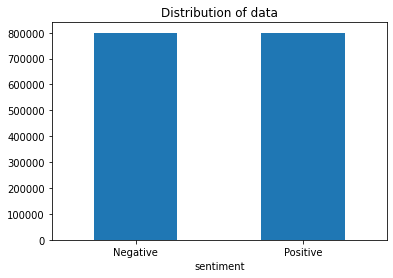

In [4]:
# distribution of sentiment
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

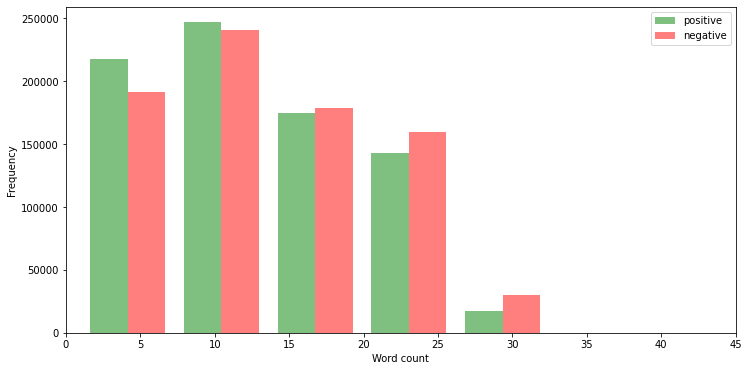

In [5]:
# get a word count per tweet text
def word_count(words):
    return len(words.split())

df['word_count'] = df['text'].apply(word_count)
pos = df['word_count'][df.sentiment == 1]
neg = df['word_count'][df.sentiment == 0]

plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')

g = plt.hist([pos, neg], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

# remove temporary word_count column
df = df[['text', 'sentiment']]

### Formatting data

In [1]:
lemmatizer = nltk.stem.WordNetLemmatizer()
swl = stopwords.words("english")

NameError: name 'nltk' is not defined

In [7]:
def preprocess(tweet):
    if(not isinstance(tweet, str)):
        return ''
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    
    tweet = tweet.lower()

    #Replaces Urls with 'URL'
    tweet = re.sub(urlPattern,' URL',tweet)

    #Replaces Usernames with 'USER'.
    tweet = re.sub(userPattern,' USER', tweet)        

    tweetwords = ''
    for word in tweet.split():
        # Checking if the word is a stopword.
        if (word not in swl and len(word) > 1):
            #Lemmatizing the word.
            word = lemmatizer.lemmatize(word)
            tweetwords += (word+' ')
    return tweetwords

In [8]:
t = time.time()
df['text'] = df['text'].apply(preprocess)
print(f'Processing Text Completed in {round(time.time()-t)} seconds.')
df

Processing Text Completed in 68 seconds.


,text,sentiment
0,"USER URL awww, that's bummer. shoulda got davi...",0
1,upset can't update facebook texting it... migh...,0
2,USER dived many time ball. managed save 50% re...,0
3,whole body feel itchy like fire,0
4,"USER no, behaving all. i'm mad. here? can't se...",0
...,...,...
1599995,woke up. school best feeling ever,1
1599996,thewdb.com cool hear old walt interviews! â« ...,1
1599997,ready mojo makeover? ask detail,1
1599998,happy 38th birthday boo alll time!!! tupac ama...,1


### Export dataset

In [9]:
df.to_csv(r'.\processed_data.csv', index=False)